In [0]:
from zipfile import ZipFile
from tensorflow.python.keras.layers import Dense,Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.python.keras import Sequential
from keras.models import Model
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import ImageFile
%matplotlib inline

Using TensorFlow backend.


In [0]:
 zf=ZipFile("/content/drive/My Drive/Chest.zip")
 zf.extractall(path='Chest')
 zf.close()

In [0]:
trainGen=ImageDataGenerator(rescale=1./255,shear_range= 0.2,zoom_range= 0.2,horizontal_flip= True,rotation_range= 40,width_shift_range = 0.2,height_shift_range = 0.2)

In [0]:
import os
path = "/content/Chest/chest_xray/chest_xray"
dirs  = os.listdir(path)
print(dirs)

['test', 'train', '.DS_Store', 'val']


In [0]:
train_folder = path + '/train/'
test_folder  = path + '/test/'
val_folder   = path + '/val/'
train_dirs = os.listdir(train_folder)
print(train_dirs)


['NORMAL', '.DS_Store', 'PNEUMONIA']


In [0]:
train_set=trainGen.flow_from_directory('/content/Chest/chest_xray/train',target_size = (64, 64),batch_size = 32,class_mode = 'binary')
test_set=trainGen.flow_from_directory('/content/Chest/chest_xray/test',target_size = (64, 64),batch_size = 32,class_mode = 'binary')
val_set=trainGen.flow_from_directory('/content/Chest/chest_xray/val',target_size = (64, 64),batch_size = 32,class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [0]:
train_normal = train_folder + 'NORMAL/'
train_pneu   = train_folder + 'PNEUMONIA/'

In [0]:
pneu_images   = glob(train_pneu + "*.jpeg")
normal_images = glob(train_normal + "*.jpeg")

In [0]:
def show_imgs(num_of_imgs):
    
    for img in range(num_of_imgs):
        pneu_pic   = np.asarray(plt.imread(pneu_images[img]))
        normal_pic = np.asarray(plt.imread(normal_images[img]))

        fig = plt.figure(figsize= (15,10))

        normal_plot = fig.add_subplot(1,2,1)
        plt.imshow(normal_pic, cmap='gray')
        normal_plot.set_title('Normal')
        plt.axis('off')

        pneu_plot = fig.add_subplot(1, 2, 2)
        plt.imshow(pneu_pic, cmap='gray')
        pneu_plot.set_title('Pneumonia')
        plt.axis('off')
    
        plt.show()

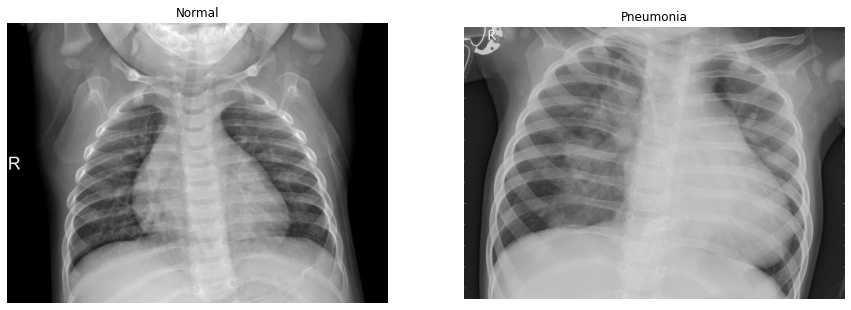

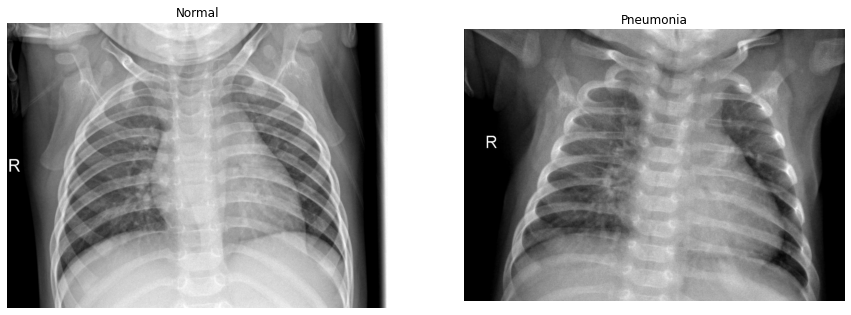

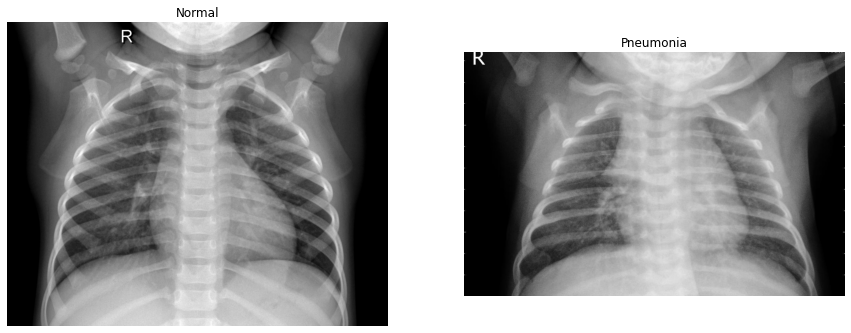

In [0]:
show_imgs(3)

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64,64,3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
# Run the cell. It will take some time to execute
r = model.fit_generator(
  train_set,
  validation_data=val_set,
  epochs=5,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
163/163 [==============================] - 92s 562ms/step - loss: 0.5406 - accuracy: 0.7289 - val_loss: 0.7269 - val_accuracy: 0.5656
Epoch 2/5
163/163 [==============================] - 86s 527ms/step - loss: 0.4734 - accuracy: 0.7498 - val_loss: 0.6738 - val_accuracy: 0.7156
Epoch 3/5
163/163 [==============================] - 86s 527ms/step - loss: 0.4394 - accuracy: 0.7774 - val_loss: 0.6246 - val_accuracy: 0.6938
Epoch 4/5
163/163 [==============================] - 86s 526ms/step - loss: 0.3896 - accuracy: 0.8183 - val_loss: 0.5374 - val_accuracy: 0.7563
Epoch 5/5
163/163 [==============================] - 85s 521ms/step - loss: 0.3370 - accuracy: 0.8474 - val_loss: 0.9071 - val_accuracy: 0.6031


In [0]:
test_accuracy = model.evaluate_generator(test_set,steps=624)

print('Testing Accuracy: {:.2f}%'.format(test_accuracy[1] * 100))

Testing Accuracy: 67.85%
